In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from methods import super_newton
from oracles import PDifferenceOracle

# Worst Instances

$$
\min\limits_{x \in \mathbb{R}^n} f(x)
= \frac{1}{q} \sum\limits_{i = 1}^{n - 1} | x^{(i)} - x^{(i + 1)} |^q
+ \frac{1}{q}|x^{(n)}|^q
$$

### Parameters

In [3]:
n = 500 # Dimension
q = 3 # Power

### Generate problem

In [4]:
oracle = PDifferenceOracle(q - 1, n)

x_0 = np.ones(n)
x_star = np.zeros(n)
mn_func = oracle.func(x_star)
M_q = 2 ** (q - 1) * math.factorial(q - 1) # Lipschitz constant

# Run Methods

### Newton Method with Gradient Regularization ($H_k := (6M_q)^{\frac{1}{q - 1}}$ is fixed), $\alpha = \frac{q - 2}{q - 1}$

In [5]:
_, msg, history_SN_fixed = super_newton(oracle, x_0, 
                                        n_iters=1300, 
                                        H_0=(6 * M_q) ** (1.0 / (q - 1)),
                                        alpha=(q - 2.0) / (q - 1),
                                        adaptive_search=False)
print('Time: %.3f s' % history_SN_fixed['time'][-1])

Time: 5.612 s


### Super-Universal Newton, $\alpha = \frac{q - 2}{q - 1}$

In [6]:
_, msg, history_SN_adaptive = super_newton(oracle, x_0, 
                                           n_iters=510, 
                                           H_0=(6 * M_q) ** (1.0 / (q - 1)),
                                           alpha=(q - 2.0) / (q - 1),
                                           adaptive_search=True)
print('Time: %.3f s' % history_SN_adaptive['time'][-1])

Time: 4.108 s


### Super-Universal Newton, $\alpha = 1$

In [7]:
_, msg, history_SN_adaptive_1 = super_newton(oracle, x_0, 
                                             n_iters=510, 
                                             H_0=(6 * M_q) ** (1.0 / (q - 1)),
                                             alpha=1.0,
                                             adaptive_search=True)
print('Time: %.3f s' % history_SN_adaptive_1['time'][-1])

Time: 4.191 s


# Show Results

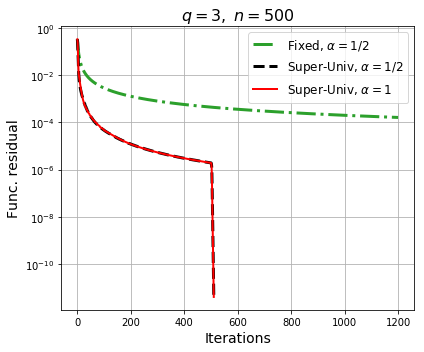

In [8]:
plt.figure(figsize=(6, 5))
plt.semilogy(np.array(history_SN_fixed['func'][0:1200]) - mn_func, '-.', 
             color='tab:green', label=r"Fixed, $\alpha = %.f/%.f$" % (q - 2, q - 1), 
             linewidth=3)

plt.semilogy(np.array(history_SN_adaptive['func']) - mn_func, '--', linewidth=3,
             color='black', label=r"Super-Univ, $\alpha = %.f/%.f$" % (q - 2, q - 1))

plt.semilogy(np.array(history_SN_adaptive_1['func']) - mn_func, color='red', 
             label=r"Super-Univ, $\alpha = 1$", linewidth=2)

plt.legend(fontsize=12)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Func. residual', fontsize=14)
plt.title((r"$q = %d, \; n = %d$" % (q, n)), 
          fontsize=16)
plt.grid()
plt.tight_layout()